# Step 1 - Pre-Work Data Check

## Agenda:

    1) Data check:
        a. Customers csv
        b. Items csv
        c. orders csv
        d. products csv
    2) Extra -  just for fun analysis

 We will be looking at the data given with the objective to:
  
     1) Detect the useful champs for our mission.
     2) Make modifications to import the data to a table.
  
   

##   Import Files and modules


In [1]:
import pandas as pd
import numpy as np
import math

customer    = pd.read_csv(".\\data\\customer.csv")
items       = pd.read_csv(".\\data\\items.csv")
orders      = pd.read_csv(".\\data\\orders.csv")
products    = pd.read_csv(".\\data\\products.csv")

## 2) Data check

#### a. Customer csv

*For this data set we are only interested in the customer_id and customer_unique_id.*

In [2]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99443 entries, 0 to 99442
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               99443 non-null  object 
 1   customer_unique_id        99442 non-null  object 
 2   customer_zip_code_prefix  99442 non-null  float64
 3   customer_city             99441 non-null  object 
 4   customer_state            99443 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.8+ MB


In [3]:
customer.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.0,sao paulo,SP


In [4]:
#are there duplicated rows?
print("nduplicated rows = " + str(customer.duplicated().sum()) )

nduplicated rows = 0


In [5]:
#check missing/null/distinct values
missing = pd.DataFrame( data = [ customer.nunique(),customer.notnull().sum() , customer.isna().sum() , ((customer.isna().sum()/ customer.count())*100)])
missing.index=[ "unique values","not null values","missing values", "percentage"]
missing.transpose()

,unique values,not null values,missing values,percentage
customer_id,99441.0,99443.0,0.0,0.000000
customer_unique_id,96096.0,99442.0,1.0,0.001006
customer_zip_code_prefix,14994.0,99442.0,1.0,0.001006
customer_city,4119.0,99441.0,2.0,0.002011
customer_state,27.0,99443.0,0.0,0.000000


> we can see that customer_id and customer_unique_id have repeated values

##### >> Customer_id

customer_id has reapeated values but not so many.

In [6]:
#do the customer_id have more than one 'customer_unique_id'? (just 2 have repeated values.)
customer['customer_id'].value_counts().sort_values(ascending=False).head()

9b8ce803689b3562defaad4613ef426f    2
7d1dd3c96c21c803f7a1a32aa8d9feb9    2
7324ecb0ff143f561193d22bea7d63fb    1
00fd9131670312e3292287415ee2e498    1
6cad022a750365e31c429d9f6eae160f    1
Name: customer_id, dtype: int64

In [7]:
#show all duplicated customer_id
customer[ customer['customer_id'].duplicated(keep=False) == True]


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
18,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416.0,sao paulo,SP
19,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416.0,NaN,SP
439,7d1dd3c96c21c803f7a1a32aa8d9feb9,729e9d3fa93475add3ea25424e83e1ad,2559.0,sao paulo,SP
440,7d1dd3c96c21c803f7a1a32aa8d9feb9,NaN,NaN,NaN,SP


> they are just repeated lines, with missing elements, we should delete rows 19 and 440

##### >> Customer_unique_id

In [8]:
#do the customer_unique_id have more than one customer_id? 
customer['customer_unique_id'].value_counts().sort_values(ascending=False).head(3)

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
Name: customer_unique_id, dtype: int64

> YES, it does and we do not need to search in detail since there are only 2 repeated customer_id values, thus the customer_unique_id has more than 1 customer_id (one to many)

In [9]:
#Getting to know the lenght of all spaces
for x in ['customer_id', 'customer_unique_id','customer_city', 'customer_state']:
    print("the Max len on [" + x + "] is =" + str(len(max(customer[customer[x].notnull()][x].tolist(), key=len))))

the Max len on [customer_id] is =32
the Max len on [customer_unique_id] is =32
the Max len on [customer_city] is =32
the Max len on [customer_state] is =2


In [10]:
# Treating floats, is tricky in python, here is a simple way
lista = customer['customer_zip_code_prefix'].to_list()
base = 0
for x in lista:
    if x > base:
        base = x
print("the Max len on [customer_zip_code_prefix] is = " + str(len(str(int(base)))))

the Max len on [customer_zip_code_prefix] is = 5


#### Observations :
1) Errors on line 19 and 440. (repeated values).
1) Customer_id do not have repeated values (after fix of line 19 & 440) and customer_unique_id have more than one customer_id.
2) The amount of missing values in the rest of the columns is negligible (even if we will not use them). 
3) No duplicate Rows.



# FIX - Customer File 

#### -- Fixing the repeated lines on Customer_id

In [11]:
customer = customer.drop(customer[ customer['customer_id'].duplicated() == True].index.tolist()) #drop lines 19 and 440
customer.to_csv(r"data\\fixed\\fixed_customer.csv",sep =',',index=False )

In [12]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99442
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               99441 non-null  object 
 1   customer_unique_id        99441 non-null  object 
 2   customer_zip_code_prefix  99441 non-null  float64
 3   customer_city             99441 non-null  object 
 4   customer_state            99441 non-null  object 
dtypes: float64(1), object(4)
memory usage: 4.6+ MB





---




## b. Items

*Here we are interested in the **order_id, order_item_id, price, frieght_value and shipping_limit_date** *

In [13]:
items['shipping_limit_date'] = items['shipping_limit_date'].astype('datetime64[s]') #formating the shipping limit date to a pandas time type
#items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])
items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [14]:
#are there duplicated rows?
print("nduplicated rows = " + str(items.duplicated().sum()) )

nduplicated rows = 0


In [15]:
missing = pd.DataFrame( data = [ items.nunique(),items.notnull().sum() , items.isna().sum() , ((items.isna().sum()/ items.count())*100), items.nunique()/items.notnull().sum()*100])
missing.index=[ "unique values","not null values","missing values", "percentage", 'distinct_%']
missing.transpose()

,unique values,not null values,missing values,percentage,distinct_%
order_id,98666.0,112650.0,0.0,0.0,87.586329
order_item_id,21.0,112650.0,0.0,0.0,0.018642
product_id,32951.0,112650.0,0.0,0.0,29.250777
seller_id,3095.0,112650.0,0.0,0.0,2.747448
shipping_limit_date,93318.0,112650.0,0.0,0.0,82.838881
price,5968.0,112650.0,0.0,0.0,5.297825
freight_value,6999.0,112650.0,0.0,0.0,6.213049


> no missing values. 

##### >> order_item_id 

In [16]:
#check the data is numeric and no irregular values 
items['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

> all good !

##### >> price and freight_value

In [17]:
#check if all rows have numeric values, if not a error should 'raise' otherwise the max number
items['price'].apply(pd.to_numeric, errors='raise').max()

6735.0

In [18]:
#Same as price 
items['freight_value'].apply(pd.to_numeric, errors='raise').max()

409.68

##### >> shipping_limit_date

In [19]:
a =items['shipping_limit_date'].dt.month.unique().tolist()
a.sort()
a

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [20]:
#Check dates are ok : get all years in shipping limit date collumn
years = items['shipping_limit_date'].dt.year.unique().tolist()
years.sort()
months = items['shipping_limit_date'].dt.month.unique().tolist()
months.sort()
days  = items['shipping_limit_date'].dt.day.unique().tolist()
days.sort()
years, min(months),max(months), min(days),max(days)

([2016, 2017, 2018, 2020], 1, 12, 1, 31)

> all good !

In [21]:
#Getting to know the lenght of all spaces in "strings" columns
for x in ['order_id', 'product_id', 'seller_id']:
    print("the Max len on [" + x + "] is =" + str(len(max(items[items[x].notnull()][x].tolist(), key=len))))

the Max len on [order_id] is =32
the Max len on [product_id] is =32
the Max len on [seller_id] is =32


In [22]:
#Getting to know the lenght of all spaces in "numeric" columns
for y in ['order_item_id','price','freight_value']:
    lista = items[y].to_list()
    base = 0
    for x in lista:
        if x > base:
            base = x
    print("the Max len on ["+y+"] is = " + str(len(str(int(base)))))

the Max len on [order_item_id] is = 2
the Max len on [price] is = 4
the Max len on [freight_value] is = 3




#### Observations :
>1) Order_id has duplicates because of re-order of the same item (found in order_item_id). We need an index for the table; we will mix order_id + order_item_id.
>2) No missing values/ nor duplicate rows. 
>3) Date time shipping_limit_date is well formated in 'shipping_limit_date'
>4) Price and freight_value are well formated and no value is missing.
>5) We do not need so much precision in shipping_limit_date, thus create a new time_limit in days

# FIX - Items File 

In [23]:
items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


####  -- Fixing- pount 1): primary key issue (order_id is not unique) by creating a new id for the table.

In [24]:
#creating a new ID col
items['id'] = items[['order_id','order_item_id']].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
items = items[['id','order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']] # re-organizing the columns
items.head(3)

,id,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb162141,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd31,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e1,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [25]:
#Getting to know the lenght of new column 'ID'
for x in ['id']:
    print("the Max len on [" + x + "] is =" + str(len(max(items[items[x].notnull()][x].tolist(), key=len))))

the Max len on [id] is =34


####  -- Fixing - point 5): Adding a new time_limit_day (by day)

In [26]:
items['shipping_limit_day'] = items['shipping_limit_date'].astype('datetime64[D]').astype('string')
items.head(3)

,id,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_limit_day
0,00010242fe8c5a6d1ba2dd792cb162141,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,2017-09-19
1,00018f77f2f0320c557190d7a144bdd31,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,2017-05-03
2,000229ec398224ef6ca0657da4fc703e1,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,2018-01-18


In [27]:
#Getting to know the lenght of the new column    
print("the Max len on [shipping_limit_day] is = " + str(len(max(items['shipping_limit_day'].astype('string').tolist(), key=len))))

the Max len on [shipping_limit_day] is = 10


In [28]:
#exporting fixed file
items = items[['id','order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value','shipping_limit_day']] # re-organizing the columns
items.to_csv(r"data//fixed//fixed_items.csv",sep =',',index=False ) # exporting




---

## c. Orders

*For this data set we are only interested in the* **order_id**, **customer_id**, **order_status, order_purchase_timestamp** and **order_estimated_delivery_date** *(since is the most non-missing date).* 

In [29]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [30]:
#we need a function for the next cell,that will avoid na values
def valid_str(x):
    if pd.notna(x):
        return(x[:10])

In [31]:
# Format all time columns + add a simpler datetime
for x in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date' , 'order_estimated_delivery_date']:
    orders[x] = orders[x].astype('datetime64[s]', errors = 'ignore')
    orders[x+'_day'] = orders[x].astype('string', errors ='ignore').apply(lambda x: valid_str(x)).astype('datetime64[D]', errors ='ignore')
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_day,order_approved_at_day,order_delivered_carrier_date_day,order_delivered_customer_date_day,order_estimated_delivery_date_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13


In [32]:
#lets check the missing values, repeated values and percentage
missing = pd.DataFrame( data = [ orders.nunique(),orders.notnull().sum() , orders.isna().sum() , ((orders.isna().sum()/ orders.count())*100)])
missing.index=[ "unique values","not null values","missing values", "percentage"]
missing.transpose()

,unique values,not null values,missing values,percentage
order_id,99441.0,99441.0,0.0,0.000000
customer_id,99441.0,99441.0,0.0,0.000000
order_status,9.0,99441.0,0.0,0.000000
order_purchase_timestamp,98876.0,99441.0,0.0,0.000000
order_approved_at,90734.0,99281.0,160.0,0.161159
order_delivered_carrier_date,81018.0,97658.0,1783.0,1.825759
order_delivered_customer_date,95664.0,96476.0,2965.0,3.073303
order_estimated_delivery_date,461.0,99440.0,1.0,0.001006
order_purchase_timestamp_day,636.0,99441.0,0.0,0.000000
order_approved_at_day,613.0,99281.0,160.0,0.161159


> Order_id, customer_id, order_status, order_purchase_timestamp do not have null values and seem ok.
> Lets check if the order_purchase_timestamp is ok*


##### >> order status 

In [33]:
#Check all different order status 
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved', '2018-02-12 11:28:47'],
      dtype=object)

> There is one label that is not possible ('2018-02-12 11:28:47'), lets check how many rows this wrong label has

In [34]:
#how many wrong status with the value of  ''2018-02-12 11:28:47'' exist? 
orders[orders['order_status'] == '2018-02-12 11:28:47']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_day,order_approved_at_day,order_delivered_carrier_date_day,order_delivered_customer_date_day,order_estimated_delivery_date_day
73892,2d3ae8314361346376456addbeb7e5ed,99895a9b5ea7a5e7b2bd960ade35f89a,2018-02-12 11:28:47,2018-02-12 12:28:03,2018-02-14 20:17:57,2018-02-19 12:09:33,2018-03-15 00:00:00,NaN,2018-02-12,2018-02-14,2018-02-19,2018-03-15,None


> ok just one wrong label that can be fixed, as the cliend received the order *thus delivered*

##### >> order purchase timestamp 

In [35]:
# check dates are correct at 'order_delivered_carrier_date' 
orders['order_purchase_timestamp_day'].apply(lambda x: x[:4]).unique().tolist()

['2017', '2018', '0000', '2016', '2077']

> 2 years are wrong 0000 and 2077, how many rows have this error?

In [36]:
#how many 'order_purchase_timestamp_year' are wrong? 
m1 = (orders['order_purchase_timestamp_day'].apply(lambda x: x[:4] == '2077')) | (orders['order_purchase_timestamp_day'].apply(lambda x: x[:4] == 'nan')) | (orders['order_purchase_timestamp_day'].apply(lambda x: x[:4] == '0000'))
orders[m1]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_day,order_approved_at_day,order_delivered_carrier_date_day,order_delivered_customer_date_day,order_estimated_delivery_date_day
130,01855f880aae9a984c7c33b26fcf2e02,2e068340b3037f667ce3224bd59260af,delivered,0000-10-19 15:08:48,0000-10-19 15:35:35,0000-10-23 13:14:16,0000-10-24 15:57:46,0000-10-31 00:00:00,0000-10-19,0000-10-19,0000-10-23,0000-10-24,0000-10-31
72442,e6a09c11fa9d7a43d90955406cab553c,ef2415ea1854ac041c3700df551dd63e,delivered,2077-08-15 07:55:36,2077-08-15 08:05:24,2077-08-17 15:31:03,2077-08-23 18:10:27,2077-09-04 00:00:00,2077-08-15,2077-08-15,2077-08-17,2077-08-23,2077-09-04


> There is only 1 row for each mistake, no way to know the year. The minimum accepted date value is 1970 thus we have to change it to it  ¯\\_(ツ)_/¯ 

In [37]:
#what are the 'order_status' that a missing value in 'order_delivered_customer_date' have?
orders[ orders['order_delivered_customer_date'].isnull()]['order_status'].unique().tolist()

['invoiced',
 'shipped',
 'processing',
 'unavailable',
 'canceled',
 'delivered',
 'created',
 'approved']

> even if the customer has been delivered it can still have the wrong status such as canceled or unavailable   

In [38]:
#Are there many orders that have been 'delivered' AND do not have a 'order_delivered_customer_date' (YES)
orders[(orders['order_status'] == 'delivered') & (orders['order_delivered_customer_date'].isnull())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_day,order_approved_at_day,order_delivered_carrier_date_day,order_delivered_customer_date_day,order_estimated_delivery_date_day
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00,2017-11-28,2017-11-28,2017-11-30,None,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00,2018-06-20,2018-06-20,2018-06-25,None,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00,2018-07-01,2018-07-01,2018-07-03,None,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00,2018-07-01,2018-07-01,2018-07-03,None,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00,2018-07-01,2018-07-01,2018-07-03,None,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00,2017-05-25,2017-05-25,None,None,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00,2018-06-08,2018-06-08,2018-06-12,None,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00,2018-06-27,2018-06-27,2018-07-03,None,2018-07-19


> The column with less missing values is 'order_estimated_delivery_date' with only 1 missing row. Thus lets analyze it and use it 

##### >> order_estimated_delivery_date

In [39]:
# Check the missing row on 'order_estimated_delivery_date'
orders[orders['order_estimated_delivery_date'].isnull()] 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_day,order_approved_at_day,order_delivered_carrier_date_day,order_delivered_customer_date_day,order_estimated_delivery_date_day
73892,2d3ae8314361346376456addbeb7e5ed,99895a9b5ea7a5e7b2bd960ade35f89a,2018-02-12 11:28:47,2018-02-12 12:28:03,2018-02-14 20:17:57,2018-02-19 12:09:33,2018-03-15 00:00:00,NaN,2018-02-12,2018-02-14,2018-02-19,2018-03-15,None


> The value is missing but we can  delivered to customer.

In [40]:
#how many 'order_purchase_timestamp_year' are wrong? 
# check dates are correct at 'order_delivered_carrier_date' 
orders[~orders['order_estimated_delivery_date_day'].isnull()]['order_estimated_delivery_date_day'].apply(lambda x: x[:4]).unique().tolist()


['2017', '2018', '0000', '2016', '2077']

In [41]:
orders[~orders['order_estimated_delivery_date_day'].isnull()].apply(lambda x: x[:4])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_day,order_approved_at_day,order_delivered_carrier_date_day,order_delivered_customer_date_day,order_estimated_delivery_date_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15


In [67]:
orders['customer_id'].nunique()

99441

In [42]:
#how many 'order_purchase_timestamp_year' are wrong? 
m1 = (~orders['order_estimated_delivery_date_day'].isnull())
a = orders[m1]
a[a['order_estimated_delivery_date_day'].apply(lambda x: x[:4] == '2077') | a['order_estimated_delivery_date_day'].apply(lambda x: x[:4] == '0000')  ]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_day,order_approved_at_day,order_delivered_carrier_date_day,order_delivered_customer_date_day,order_estimated_delivery_date_day
130,01855f880aae9a984c7c33b26fcf2e02,2e068340b3037f667ce3224bd59260af,delivered,0000-10-19 15:08:48,0000-10-19 15:35:35,0000-10-23 13:14:16,0000-10-24 15:57:46,0000-10-31 00:00:00,0000-10-19,0000-10-19,0000-10-23,0000-10-24,0000-10-31
72442,e6a09c11fa9d7a43d90955406cab553c,ef2415ea1854ac041c3700df551dd63e,delivered,2077-08-15 07:55:36,2077-08-15 08:05:24,2077-08-17 15:31:03,2077-08-23 18:10:27,2077-09-04 00:00:00,2077-08-15,2077-08-15,2077-08-17,2077-08-23,2077-09-04


> these are the same rows as before


#### Observations :
>1) There are several missing values, however the main cols 'order_id', 'customer_id', 'order_purchase_timestamp' and 'order_estimated_delivery_date'  have no missing values.
>2) Typo:  row = 73892 wrong order_status and missing estimated_delivery_date. Need to be changed to 'delivered' and copy the same time as delivered to customer
>3) Typo:  row = 72442 has the wrong year, it cant be delivered already in year 2077.
>4) Typo:  row = 130 the year is missing in all colls, must change to 1970
>5) Useful cols = oder_id, customer_id, order_status, 

For this mission we will still use the other time columns but in a real usage we should first go deeper on why the status/times are not working properly.


# FIX - Orders File 

####  -- Fixing- point 2) Typo in row 73892

In [43]:
orders.iloc[73892]

order_id                             2d3ae8314361346376456addbeb7e5ed
customer_id                          99895a9b5ea7a5e7b2bd960ade35f89a
order_status                                      2018-02-12 11:28:47
order_purchase_timestamp                          2018-02-12 12:28:03
order_approved_at                                 2018-02-14 20:17:57
order_delivered_carrier_date                      2018-02-19 12:09:33
order_delivered_customer_date                     2018-03-15 00:00:00
order_estimated_delivery_date                                     NaN
order_purchase_timestamp_day                               2018-02-12
order_approved_at_day                                      2018-02-14
order_delivered_carrier_date_day                           2018-02-19
order_delivered_customer_date_day                          2018-03-15
order_estimated_delivery_date_day                                None
Name: 73892, dtype: object

In [44]:
orders['order_status'].iloc[73892] = 'delivered'
orders['order_estimated_delivery_date_day'] = orders['order_delivered_customer_date'].iloc[73892]
orders.iloc[73892]



order_id                             2d3ae8314361346376456addbeb7e5ed
customer_id                          99895a9b5ea7a5e7b2bd960ade35f89a
order_status                                                delivered
order_purchase_timestamp                          2018-02-12 12:28:03
order_approved_at                                 2018-02-14 20:17:57
order_delivered_carrier_date                      2018-02-19 12:09:33
order_delivered_customer_date                     2018-03-15 00:00:00
order_estimated_delivery_date                                     NaN
order_purchase_timestamp_day                               2018-02-12
order_approved_at_day                                      2018-02-14
order_delivered_carrier_date_day                           2018-02-19
order_delivered_customer_date_day                          2018-03-15
order_estimated_delivery_date_day                 2018-03-15 00:00:00
Name: 73892, dtype: object

####  -- Fixing- point 5) missing year on row 130

In [45]:
orders.iloc[130]

order_id                             01855f880aae9a984c7c33b26fcf2e02
customer_id                          2e068340b3037f667ce3224bd59260af
order_status                                                delivered
order_purchase_timestamp                          0000-10-19 15:08:48
order_approved_at                                 0000-10-19 15:35:35
order_delivered_carrier_date                      0000-10-23 13:14:16
order_delivered_customer_date                     0000-10-24 15:57:46
order_estimated_delivery_date                     0000-10-31 00:00:00
order_purchase_timestamp_day                               0000-10-19
order_approved_at_day                                      0000-10-19
order_delivered_carrier_date_day                           0000-10-23
order_delivered_customer_date_day                          0000-10-24
order_estimated_delivery_date_day                 2018-03-15 00:00:00
Name: 130, dtype: object

In [46]:
lista = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_purchase_timestamp_day', 'order_approved_at_day', 'order_delivered_carrier_date_day', 'order_delivered_customer_date_day']

In [47]:
for x in lista:
    orders[x].iloc[130] = '1970'+orders[x].iloc[130][4:]
orders.iloc[130]

order_id                             01855f880aae9a984c7c33b26fcf2e02
customer_id                          2e068340b3037f667ce3224bd59260af
order_status                                                delivered
order_purchase_timestamp                          1970-10-19 15:08:48
order_approved_at                                 1970-10-19 15:35:35
order_delivered_carrier_date                      1970-10-23 13:14:16
order_delivered_customer_date                     1970-10-24 15:57:46
order_estimated_delivery_date                     1970-10-31 00:00:00
order_purchase_timestamp_day                               1970-10-19
order_approved_at_day                                      1970-10-19
order_delivered_carrier_date_day                           1970-10-23
order_delivered_customer_date_day                          1970-10-24
order_estimated_delivery_date_day                 2018-03-15 00:00:00
Name: 130, dtype: object

In [48]:
#exporting fixed file
orders.to_csv(r"data//fixed//fixed_orders.csv",sep =',',index=False ) # exporting


---

## d. Products

*For this data set we are only interested in the* **product_id** * and **product_weight_g**  

In [49]:
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure


In [50]:
missing = pd.DataFrame( data = [ products.nunique(),products.notnull().sum() , products.isna().sum() , ((products.isna().sum()/ products.count())*100)])
missing.index=[ "unique values","not null values","missing values", "percentage"]
missing.transpose()

,unique values,not null values,missing values,percentage
product_id,32952.0,32952.0,0.0,0.000000
product_category_name,71.0,32328.0,624.0,1.930215
product_name_lenght,66.0,32341.0,611.0,1.889243
product_description_lenght,2960.0,32341.0,611.0,1.889243
product_photos_qty,20.0,32342.0,610.0,1.886092
product_weight_g,2205.0,32950.0,2.0,0.006070
product_length_cm,99.0,32950.0,2.0,0.006070
product_height_cm,102.0,32950.0,2.0,0.006070
product_width_cm,95.0,32949.0,3.0,0.009105
product_category_name_english,71.0,32328.0,624.0,1.930215


> product_id is perfect: no repeated nor missing values
> product_weight has 2 missing vlaues lets check!

In [51]:
products[products['product_weight_g'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
8579,09ff539a621711667c43eba6a3bd8466,baby,60.0,865.0,3.0,NaN,NaN,NaN,NaN,baby
18852,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> not much help on these articles, the row 18852 is just useless and the 8579 wont give much information neither.  

In [52]:
#besides the 2 mising values showned before lets check other non valid values such as  negative ones?
products['product_weight_g'].apply(pd.to_numeric, errors='raise').min(),products['product_weight_g'].apply(pd.to_numeric, errors='raise').max()

(0.0, 40425.0)

> Values are normal


#### Observations :
>1) There are several missing values, however the main col 'order_id' has no missing values.
>2) product weight can be uses with the exception of 2 products (negligable) and fixable.

# FIX - Products File 

In [53]:
#setting weights to zero
products.loc[8579,'product_weight_g'] = 0

In [54]:
products.loc[18852, 'product_weight_g'] = 0

In [55]:
#exporting fixed file
products.to_csv(r"data//fixed//fixed_products.csv",sep =',',index=False ) # exporting

---
---

## EXTRA - Small analysis on the data

## Customers

In [56]:
#Get top 5 Cities 
customer_count = customer.groupby('customer_city').count()['customer_id'].sort_values(ascending=False).head(5)

# checking the cities distribution
print(customer_count,'\n---\n', customer.groupby('customer_city').count()['customer_id'].describe(),'\n---')


customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: customer_id, dtype: int64 
---
 count     4119.000000
mean        24.142025
std        279.272382
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max      15540.000000
Name: customer_id, dtype: float64 
---


>High concentration of customers on top cities (example : Sao Paulo 15.6%).

## Items

In [57]:
items['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [58]:
for x in [300,400,500,600]:
    print(items[items['price']>x].count()[0]/112650*100)

6.158011540168664
3.762982689747004
2.854860186418109
2.0550377274744784


In [59]:
6937/112650*100

6.158011540168664

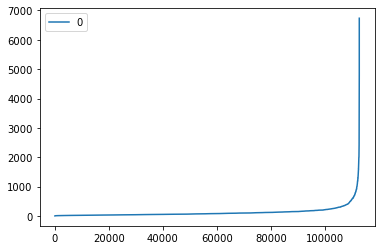

In [60]:
pd.DataFrame(np.sort(items['price'])).plot()

> There is a tiny amount of price outliers. Only 6% of products are over 300 in price.

In [61]:
itemdf= pd.DataFrame(items.groupby('product_id').count()['order_id'].sort_values(ascending=False)) #count products + sort from most used to least
itemdf['prod_cum_sum']=items.groupby('product_id').count()['order_id'].sort_values(ascending=False).cumsum() #add a cumulative sum col
itemdf['prod_%']=items.groupby('product_id').count()['order_id'].sort_values(ascending=False)/112650 *100 #with percentage
itemdf['prod_cum_%']=itemdf['prod_%'].cumsum() #%cumulative sum
itemdf.reset_index(level=0, inplace=True) #take out the prod_id and replace for 0,1,2..
itemdf['counts'] = itemdf['order_id'] # change the name to counts
itemdf.drop(['product_id','order_id'], axis =1, inplace=True) # drop the unused cols
itemdf = itemdf.reindex(columns=['counts','prod_cum_sum', 'prod_%', 'prod_cum_%']) # order columns
itemdf.head(3), itemdf.head(3) 

(   counts  prod_cum_sum    prod_%  prod_cum_%
 0     527           527  0.467821    0.467821
 1     488          1015  0.433200    0.901021
 2     484          1499  0.429649    1.330670,
    counts  prod_cum_sum    prod_%  prod_cum_%
 0     527           527  0.467821    0.467821
 1     488          1015  0.433200    0.901021
 2     484          1499  0.429649    1.330670)

In [62]:
itemdf[itemdf['prod_cum_%']>60].head(1)

,counts,prod_cum_sum,prod_%,prod_cum_%
4587,5,67590,0.004439,60.0


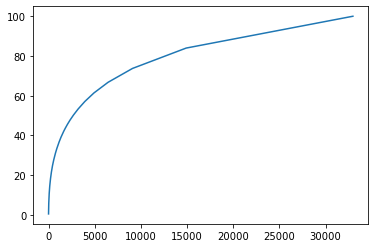

In [63]:
 itemdf['prod_cum_%'].plot()

> Pareto: The vast mayority of orders are from a small amount of products ( 14% of products make more than 60% of all orders)

## Orders

In [64]:
d1 = orders[orders['order_status'] == 'delivered']
m2 = orders[orders['order_status'] =='delivered']['order_approved_at'].isna()
d1[m2].head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_day,order_approved_at_day,order_delivered_carrier_date_day,order_delivered_customer_date_day,order_estimated_delivery_date_day
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00,2017-02-18,None,2017-02-23,2017-03-01,2018-03-15 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00,2017-02-18,None,2017-02-23,2017-03-02,2018-03-15 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00,2017-02-18,None,2017-02-22,2017-03-01,2018-03-15 00:00:00


> There were 16 orders that were delivered and NOT approved.